In [1]:
import tensorflow as tf
import numpy as np
# All tensors are immutable like Python numbers and strings:
#  you can never update the contents of a tensor, only create a new one.
# When we say tensor rank n, that means the tensor has n axes.
# rank 0 mean scalar, rank 1 mean vector, rank 2 mean matrix, rank 3 mean 3-tensor, etc.

2023-08-27 10:45:23.402306: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-27 10:45:23.403570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 10:45:23.430680: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 10:45:23.431258: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 10:45:24.149035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

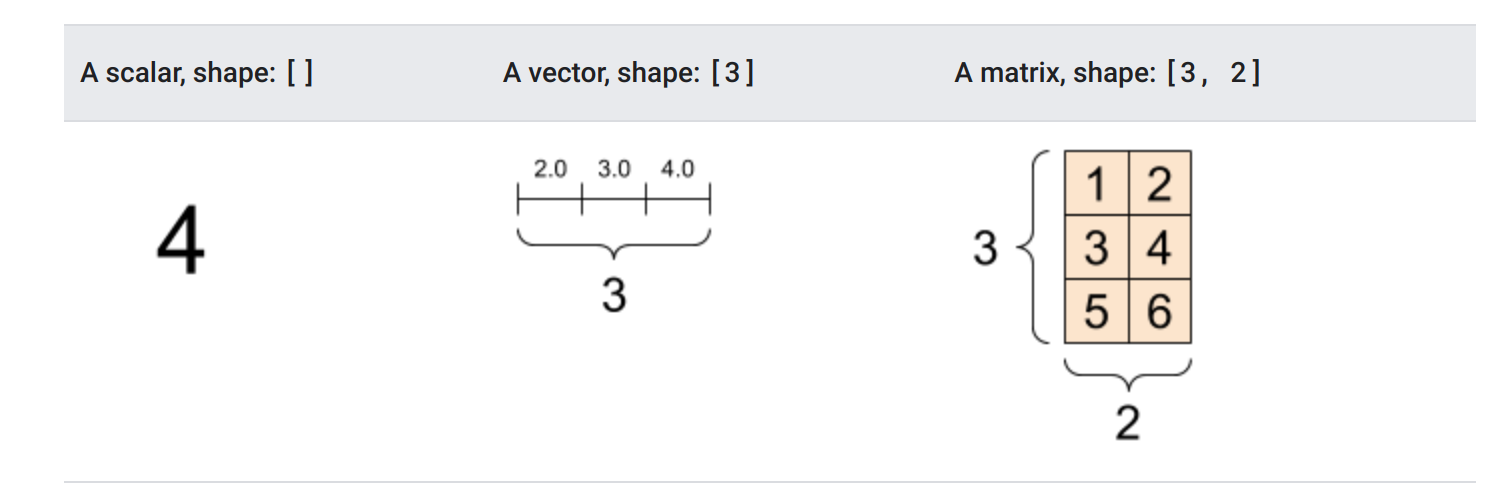

In [2]:
# In here, Tensors is just a fancy name for arrays or a multidimentional array.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)
print(rank_0_tensor.numpy())
# Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

tf.Tensor(4, shape=(), dtype=int32)
4


In [3]:
# A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:
rank_1_tensor = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])
print(rank_1_tensor)
print(rank_1_tensor.shape)

tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)
(8,)


In [4]:
# A "matrix" or "rank-2" tensor has two axes:
rank_2_tensor = tf.constant([[1, 2],[2,3]])
print(rank_2_tensor)
print(rank_2_tensor.shape)

tf.Tensor(
[[1 2]
 [2 3]], shape=(2, 2), dtype=int32)
(2, 2)


In [5]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor.shape)

(3, 2, 5)


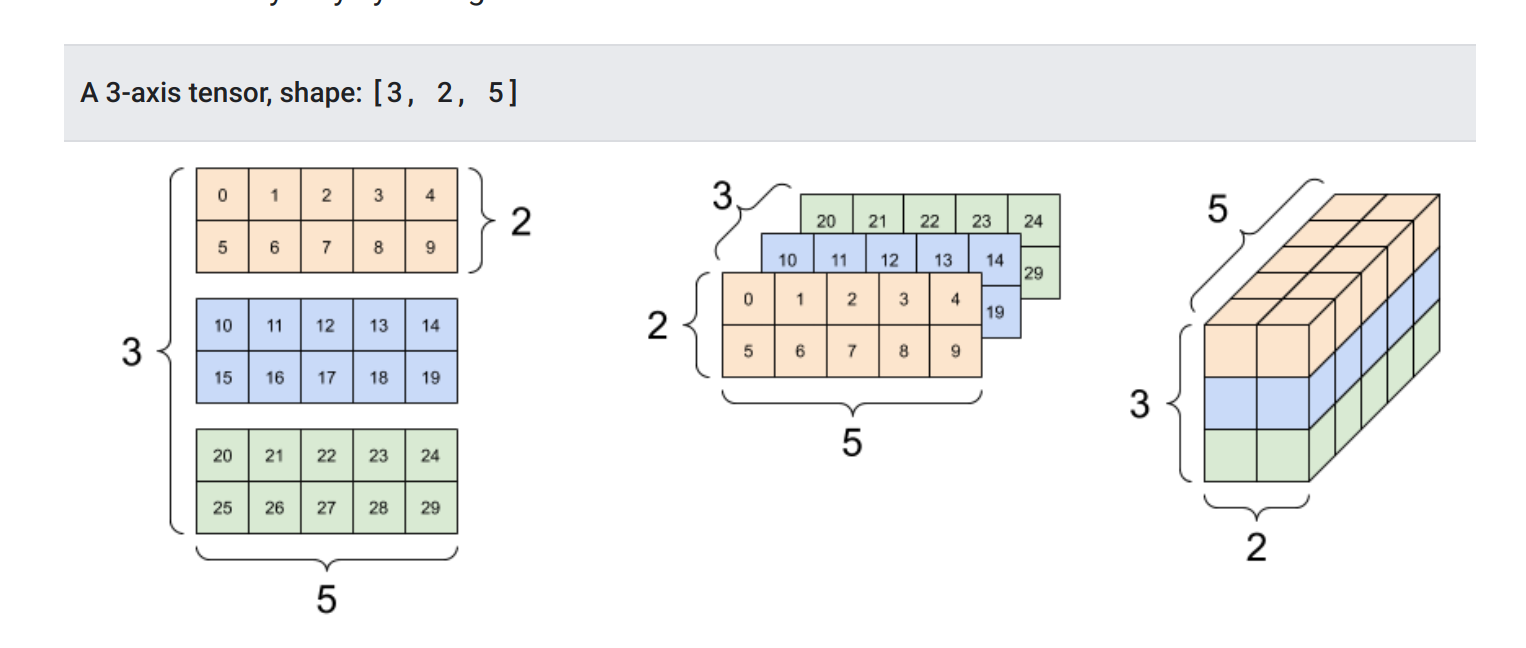

In [6]:
# Basic math with tensors
a = tf.constant(
    [
        [1, 2],
        [3, 4]
    ]
)
b = tf.constant(
    [
        [5, 6],
        [7, 8]
    ]
)

print(tf.add(a, b).numpy(), "\n")
print(tf.multiply(a, b).numpy(), "\n")
print(tf.matmul(a, b).numpy(), "\n")

[[ 6  8]
 [10 12]] 

[[ 5 12]
 [21 32]] 

[[19 22]
 [43 50]] 


In [7]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the max value 
print(tf.reduce_max(c).numpy())

# Find the min value
print(tf.reduce_min(c).numpy())

# Find the mean value
print(tf.reduce_mean(c).numpy())

# Find the product of all values
print(tf.reduce_prod(c).numpy())

# Compute the softmax
print(tf.nn.softmax(c).numpy())



10.0
1.0
5.0
200.0
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]]


In [8]:
# Indexing and Slicing
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

print("First:", rank_1_tensor[0].numpy())

print("Second:", rank_1_tensor[1].numpy())

print("Last:", rank_1_tensor[-1].numpy())

# Slice starting from index 2 to the end
print("Everything:", rank_1_tensor[:].numpy())

print("Before 4:", rank_1_tensor[:4].numpy())

print("From 4 to the end:", rank_1_tensor[4:].numpy())

print("From 2, before 7:", rank_1_tensor[2:7].numpy())

print("Every other item:", rank_1_tensor[::2].numpy())

print("Reversed:", rank_1_tensor[::-1].numpy())

[ 0  1  1  2  3  5  8 13 21 34]
First: 0
Second: 1
Last: 34
Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [9]:
# Reshaping tensors 
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

print(x.ndim)

print(x[0].numpy())

# You can convert this object into a Python list, too
print(x.shape.as_list())

# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])
print(reshaped.numpy())

(3, 1)
2
[1]
[3, 1]
[[1 2 3]]


In [10]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(x, [-1]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [11]:
# Ragged Tensor mean that the tensor has one or more ragged dimensions

ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor.shape)
print(ragged_tensor[1].numpy())

ValueError: Can't convert non-rectangular Python sequence to Tensor.
(4, None)
[4 5]


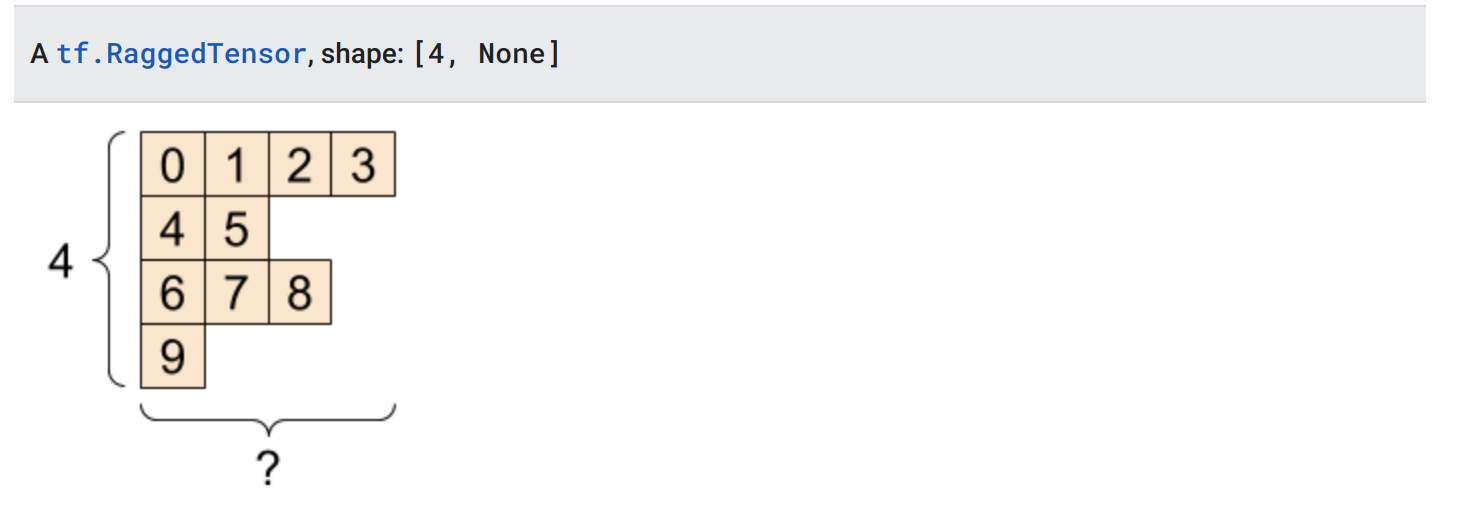